In [218]:
import cv2 as cv
import numpy as np
from skimage.io import imshow

In [219]:
im_0 = cv.imread("/home/egor/Downloads/Image__2024-02-27__10-31-46.bmp")

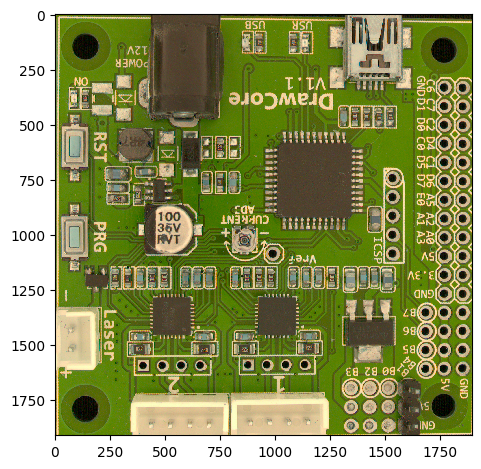

In [220]:
imshow(im_0)

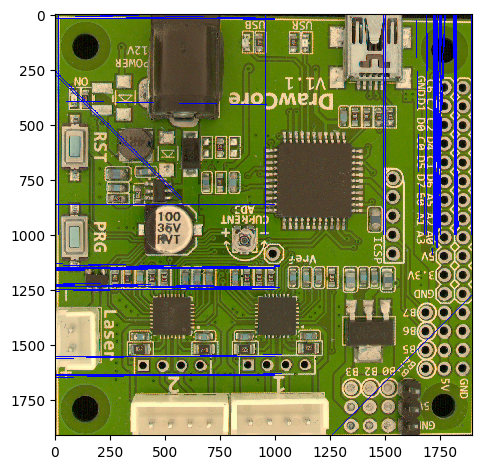

In [84]:
im = im_0.copy()
gray = cv.cvtColor(im, cv.COLOR_RGB2GRAY)


edges = cv.Canny(gray, 280, 280, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(im, (x1, y1), (x2, y2), (0, 0, 255), 2)

imshow(im)

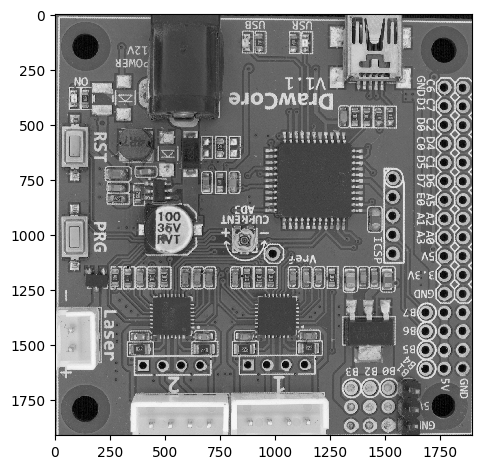

In [224]:
im = im_0.copy()
im = cv.cvtColor(im, cv.COLOR_RGB2GRAY)

imf = np.float32(im) / 255.0 - 0.5  # float conversion/scale
dst = cv.dct(imf)  # the dct

n = -5
m = -1
dst[n:m, n:m] = 0

im = cv.idct(dst)
im = np.uint8((im + 0.5) * 255.0)

imshow(im)

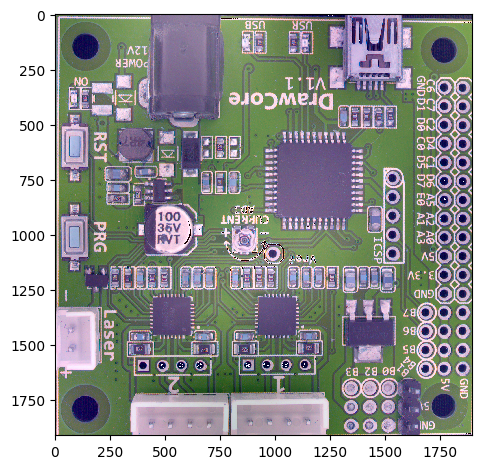

In [134]:
im = im_0.copy()
im = cv.cvtColor(im, cv.COLOR_RGB2YCR_CB)

for i in range(0, 3):
    layer = im[:, :, i]

    imf = np.float32(layer) / 255.0 - 0.5  # float conversion/scale
    dst = cv.dct(imf)  # the dct

    n = 0
    m = 4
    dst[n:m, n:m] = -0.5

    layer = cv.idct(dst)
    layer = np.uint8((layer+0.5) * 255.0)

    im[:, :, i] = layer

im = cv.cvtColor(im, cv.COLOR_YCR_CB2RGB)
imshow(im)

In [147]:
def transformRGB2YIQ(imgRGB: np.ndarray) -> np.ndarray:
    """
    Converts an RGB image to YIQ color space
    :param imgRGB: An Image in RGB
    :return: A YIQ in image color space
    """
    yiq_from_rgb = np.array([[0.299, 0.587, 0.114],
                             [0.59590059, -0.27455667, -0.32134392],
                             [0.21153661, -0.52273617, 0.31119955]])
    OrigShape=imgRGB.shape
    return np.dot(imgRGB.reshape(-1,3), yiq_from_rgb.transpose()).reshape(OrigShape)

    pass


def transformYIQ2RGB(imgYIQ: np.ndarray) -> np.ndarray:
    """
    Converts an YIQ image to RGB color space
    :param imgYIQ: An Image in YIQ
    :return: A RGB in image color space
    """
    yiq_from_rgb = np.array([[0.299, 0.587, 0.114],
                             [0.59590059, -0.27455667, -0.32134392],
                             [0.21153661, -0.52273617, 0.31119955]])
    OrigShape=imgYIQ.shape
    return np.dot(imgYIQ.reshape(-1,3), np.linalg.inv(yiq_from_rgb).transpose()).reshape(OrigShape)

    pass

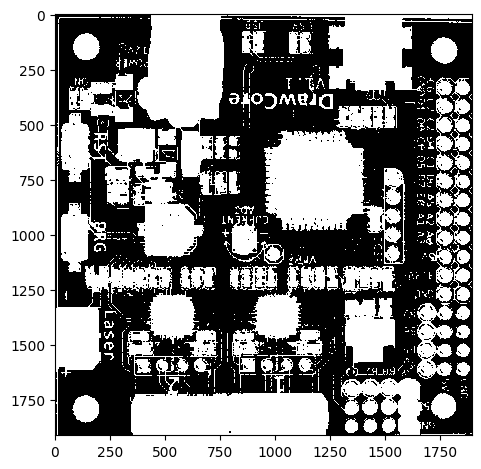

In [217]:
im = im_0.copy()
im = cv.medianBlur(im, 5)
im = transformRGB2YIQ(im / 255)

im[:,:,0] = (im[:,:,0] - np.min(im[:,:,0])) / (np.max(im[:,:,0]) - np.min(im[:,:,0]))
im[:,:,1] = (im[:,:,1] - np.min(im[:,:,1])) / (np.max(im[:,:,1]) - np.min(im[:,:,1]))
im[:,:,2] = (im[:,:,2] - np.min(im[:,:,2])) / (np.max(im[:,:,2]) - np.min(im[:,:,2]))
im = np.uint8(im[:,:,2] * 255)

value, im = cv.threshold(im, 0, 255, cv.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
im = cv.morphologyEx(im, cv.MORPH_ERODE, kernel)
# im = cv.morphologyEx(im, cv.MORPH_ERODE, kernel)
# im = cv.morphologyEx(im, cv.MORPH_ERODE, kernel)

imshow(im)

In [ ]:


# kernel = np.ones((5, 5), np.uint8)
# im = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)

# im = cv2.medianBlur(im, 5)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
# im = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)

# kernel = np.ones((5, 5), np.uint8)
# im = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)

# kernel = np.ones((1, 1), np.uint8)
# im = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)
